In [1]:
from keras.datasets import imdb
training_set, testing_set = imdb.load_data(index_from =3)
X_train,y_train = training_set
X_test,y_test = testing_set

Using TensorFlow backend.
C:\Users\mmsub\Anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\mmsub\Anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\mmsub\Anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\mmsub\Anaconda3\envs\learn

17465344/17464789 [==============================] - 7s 0us/step


In [2]:
print(X_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [3]:
word_to_id = imdb.get_word_index()
word_to_id = {key:(value+3) for key, value in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
id_to_word = {value: key for key,value in word_to_id.items()}
print(' '.join(id_to_word[id] for id in X_train[159]))

1646592/1641221 [==============================] - 2s 1us/step
<START> a rating of 1 does not begin to express how dull depressing and relentlessly bad this movie is


In [4]:
print(y_train[159])

0


In [5]:
print(' '.join(id_to_word[id] for id in X_train[6]))

<START> lavish production values and solid performances in this straightforward adaption of jane austen's satirical classic about the marriage game within and between the classes in provincial 18th century england northam and paltrow are a salutory mixture as friends who must pass through jealousies and lies to discover that they love each other good humor is a sustaining virtue which goes a long way towards explaining the accessability of the aged source material which has been toned down a bit in its harsh scepticism i liked the look of the film and how shots were set up and i thought it didn't rely too much on successions of head shots like most other films of the 80s and 90s do very good results


In [6]:
print(y_train[6])

1


In [7]:
training_set, testing_set = imdb.load_data(num_words = 10000)
X_train,y_train = training_set
X_test,y_test = testing_set

In [8]:
print("Number of training samples ={}".format(X_train.shape[0]))
print("Number of testing samples ={}".format(X_test.shape[0]))

Number of training samples =25000
Number of testing samples =25000


In [9]:
from keras.preprocessing import sequence

In [10]:
from keras.models import Sequential
model = Sequential()

In [22]:
from keras.preprocessing import sequence

In [23]:
X_train_padded = sequence.pad_sequences(X_train,maxlen=100)
X_test_padded = sequence.pad_sequences(X_test,maxlen=100)

In [11]:
from keras.layers import Embedding

In [12]:
model.add(Embedding(input_dim = 10000,output_dim=128))

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
from keras.layers import LSTM

In [14]:
model.add(LSTM(units=128))

In [15]:
from keras.layers import Dense

In [16]:
model.add(Dense(units=1,activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         1280000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 1,411,713
Trainable params: 1,411,713
Non-trainable params: 0
_________________________________________________________________


In [18]:
Optimizer = 'SGD'

In [20]:
model.compile(loss='binary_crossentropy',optimizer = Optimizer)

In [24]:
scores = model.fit(x=X_train_padded,y=y_train,batch_size=128,epochs=10,validation_data=(X_test_padded,y_test))

Instructions for updating:
Use tf.cast instead.
Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 81s 3ms/step - loss: 0.6932 - val_loss: 0.6932
Epoch 2/10
25000/25000 [==============================] - 104s 4ms/step - loss: 0.6932 - val_loss: 0.6931
Epoch 3/10
25000/25000 [==============================] - 99s 4ms/step - loss: 0.6931 - val_loss: 0.6930
Epoch 4/10
25000/25000 [==============================] - 94s 4ms/step - loss: 0.6930 - val_loss: 0.6930
Epoch 5/10
25000/25000 [==============================] - 92s 4ms/step - loss: 0.6930 - val_loss: 0.6929
Epoch 6/10
25000/25000 [==============================] - 86s 3ms/step - loss: 0.6929 - val_loss: 0.6929
Epoch 7/10
25000/25000 [==============================] - 91s 4ms/step - loss: 0.6928 - val_loss: 0.6928
Epoch 8/10
25000/25000 [==============================] - 88s 4ms/step - loss: 0.6928 - val_loss: 0.6927
Epoch 9/10
25000/25000 [==============================] - 85s

In [27]:
def train_model(Optimizer,X_train,y_train,X_val,y_val):
    model = Sequential()
    model.add(Embedding(input_dim=10000,output_dim=128))
    model.add(LSTM(units=128))
    model.add(Dense(units=1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer = Optimizer,metrics=['accuracy'])
    scores = model.fit(X_train,y_train,batch_size=128,epochs=10,validation_data=(X_val,y_val),verbose=0)
    return scores, model

In [28]:
SGD_score,SGD_model=train_model(Optimizer='sgd',X_train=X_train_padded,y_train=y_train,X_val=X_test_padded,y_val=y_test)

In [29]:
RMSprop_score,RMSprop_model=train_model(Optimizer='RMSprop',X_train=X_train_padded,y_train=y_train,
                                        X_val=X_test_padded,y_val=y_test)

In [30]:
Adam_score,Adam_model=train_model(Optimizer='adam',X_train=X_train_padded,y_train=y_train,X_val=X_test_padded,y_val=y_test)

In [31]:
from matplotlib import pyplot as plt

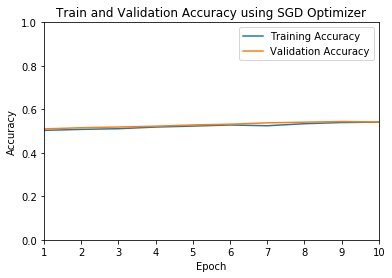

In [35]:
plt.plot(range(1,11),SGD_score.history['accuracy'],label='Training Accuracy')
plt.plot(range(1,11),SGD_score.history['val_accuracy'],label= 'Validation Accuracy')
plt.axis([1,10,0,1])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy using SGD Optimizer')
plt.legend()
plt.show()

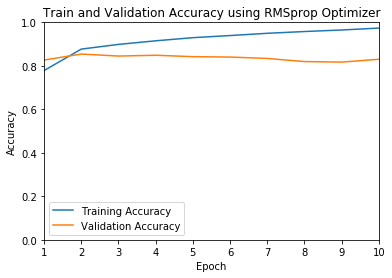

In [39]:
plt.plot(range(1,11),RMSprop_score.history['accuracy'],label='Training Accuracy')
plt.plot(range(1,11),RMSprop_score.history['val_accuracy'],label= 'Validation Accuracy')
plt.axis([1,10,0,1])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy using RMSprop Optimizer')
plt.legend()
plt.show()

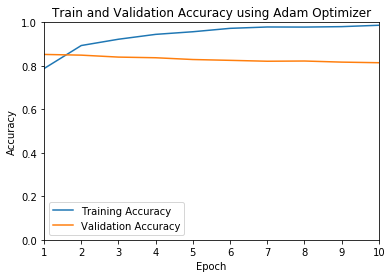

In [40]:
plt.plot(range(1,11),Adam_score.history['accuracy'],label='Training Accuracy')
plt.plot(range(1,11),Adam_score.history['val_accuracy'],label= 'Validation Accuracy')
plt.axis([1,10,0,1])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy using Adam Optimizer')
plt.legend()
plt.show()

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

Text(56.406249999999986, 0.5, 'Actual')

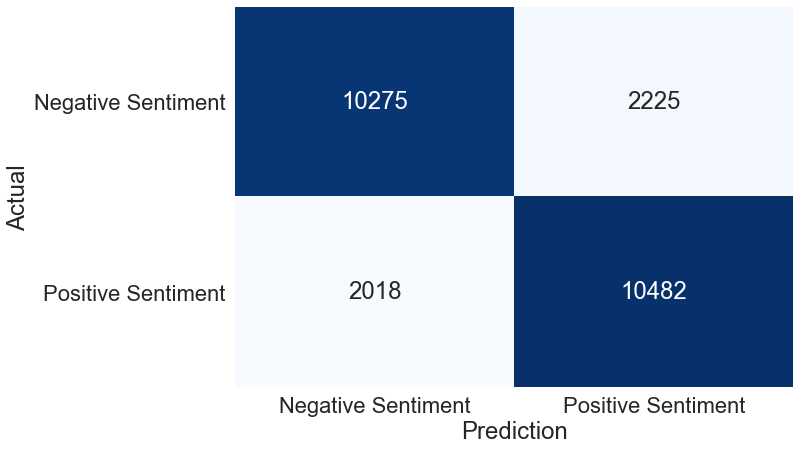

In [44]:
plt.figure(figsize=(10,7))
sns.set(font_scale=2)
y_test_pred = RMSprop_model.predict_classes(X_test_padded)
cm = confusion_matrix(y_test,y_test_pred)
ax = sns.heatmap(cm,annot=True,xticklabels=['Negative Sentiment','Positive Sentiment'],
                 yticklabels=['Negative Sentiment','Positive Sentiment'],cbar=False,cmap='Blues',fmt='g')
ax.set_xlabel('Prediction')
ax.set_ylabel('Actual')

In [62]:
false_negatives = []
false_positives = []

In [63]:
for i in range(len(y_test_pred)):
    if y_test_pred[i][0] != y_test[i]:
        if y_test[i]==0:
            false_positives.append(i)
        else:
            false_negatives.append(i)

In [65]:
len(false_positives)

2225